In [234]:
import pickle
import pandas as pd
lgg_data = pd.read_pickle("../tcga/dense_features/lgg_features_v1.pkl")

In [235]:
tumor_type = 'gbm'
filename = '../tcga/dense_features/'+tumor_type + '_list_v1.pkl'
with open(filename, 'rb') as f:
    newlist = pickle.load(f)
    
flat_list = [item.T for sublist in newlist for item in sublist]
#a = [pd.concat(sublist) for sublist in newlist]
#gbm_data = pd.concat(flat_list)
c = pd.concat(flat_list, keys=['Size.Area, Size.MajorAxisLength, Size.MinorAxisLength',\
         'Size.Perimter',  'Shape.Circularity', 'Shape.Eccentricity',\
        'Shape.EquivalentDiameter', 'Shape.Extent', 'Shape.MinorMajorAxisRatio',\
        'Shape.Solidity', 'Age (years at diagnosis)', 'Gender'])

In [236]:
ar = [df.loc[:,~df.columns.duplicated()] for df in flat_list]

In [237]:
lgg_data.shape

(7154, 19)

In [238]:
gbm_data = pd.concat(ar)

In [239]:
lgg_data = lgg_data.loc[:,~lgg_data.columns.duplicated()]

In [240]:
gbm_data.shape

(8835, 18)

In [241]:
gbm_data['IS_GBM'] = 1
lgg_data['IS_GBM'] = 0

data =  pd.concat([gbm_data, lgg_data])

print('GBM shape:' + str(gbm_data.shape) + 'LGG shape:' + str(lgg_data.shape) + 'All shape:' + str(data.shape))

GBM shape:(8835, 19)LGG shape:(7154, 19)All shape:(15989, 19)


In [242]:
data.columns

Index([ u'Age (years at diagnosis)',                      u'Case',
                          u'Gender',                     u'Grade',
                              u'ID',                    u'IS_GBM',
            u'MGMT promoter status',         u'Shape.Circularity',
              u'Shape.Eccentricity',  u'Shape.EquivalentDiameter',
                    u'Shape.Extent', u'Shape.MinorMajorAxisRatio',
                  u'Shape.Solidity',                 u'Size.Area',
            u'Size.MajorAxisLength',      u'Size.MinorAxisLength',
                  u'Size.Perimeter',         u'Survival (months)',
           u'Vital status (1=dead)'],
      dtype='object')

In [243]:
X = data[['Size.Area', 'Size.MajorAxisLength', 'Size.MinorAxisLength',\
         'Size.Perimeter',  'Shape.Circularity', 'Shape.Eccentricity',\
        'Shape.EquivalentDiameter', 'Shape.Extent', 'Shape.MinorMajorAxisRatio',\
        'Shape.Solidity', 'Age (years at diagnosis)', 'Gender']]

In [252]:
X.shape

(15989, 12)

(0.8597039816552011, 'predicting tumor type, with x_train size', 11192)


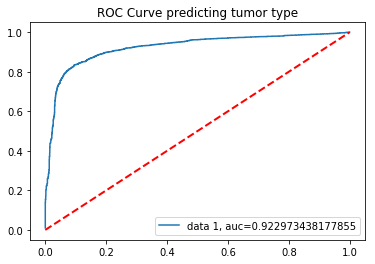

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
y = data[['IS_GBM']]
X = X.fillna(-1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LogisticRegression()
lr.fit(x_train, y_train)
#predictions_type = lr.predict(x_test)
score = lr.score(x_test, y_test)
print(score,"predicting tumor type, with x_train size",len(x_train))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title("ROC Curve predicting tumor type")
plt.show()

In [254]:
y = data[['Survival (months)']]
X = X.fillna(-1)
y = y.fillna(1000)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
#predictions_type = lr.predict(x_test)
score = lr.score(x_test, y_test)
print(score,"predicting survival, with x_train size",len(x_train))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title("ROC Curve predicting tumor type")
plt.show()

(0.5223193993920696, 'predicting survival, with x_train size', 11192)


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [255]:
y = data[['Grade']]
X = X.fillna(1)
y = y.fillna(1000)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(x_train, y_train)
#predictions_type = lr.predict(x_test)
score = lr.score(x_test, y_test)
print(score,"predicting survival, with x_train size",len(x_train))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title("ROC Curve predicting tumor type")
plt.show()

(0.7212841359182822, 'predicting survival, with x_train size', 11192)


ValueError: multiclass format is not supported

In [256]:
grades = data[['Grade']].fillna(-1).as_matrix()

l = grades.squeeze().tolist()
import collections
collections.Counter(l)

Counter({-1.0: 1073, 2.0: 3144, 3.0: 3390, 4.0: 8382})

In [257]:
import os
import matplotlib.pyplot as plt
import numpy as np
def get_img(tumor_type, idx, res=256):
    im_dir = '../tcga/'+str(res)+'/train/' + tumor_type + '/'
    imgs = [im_dir + imname for imname in os.listdir(im_dir)]
    img = plt.imread(imgs[idx])
    mask = img < 1.0
    # Coordinates of non-black pixels.
    coords = np.argwhere(mask)

    # Bounding box of non-black pixels.
    x0, y0, intensity = coords.min(axis=0)
    x1, y1, intensity = coords.max(axis=0) + 1   # slices are exclusive at the top

    # Get the contents of the bounding box.
    cropped = img[x0:x1, y0:y1]
    return cropped

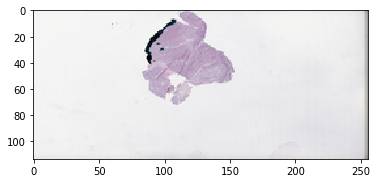

In [258]:
a = get_img('gbm', 20)
mask = a < 1.0
# Coordinates of non-black pixels.
coords = np.argwhere(mask)

# Bounding box of non-black pixels.
x0, y0, intensity = coords.min(axis=0)
x1, y1, intensity = coords.max(axis=0) + 1   # slices are exclusive at the top

# Get the contents of the bounding box.
cropped = a[x0:x1, y0:y1]
plt.imshow(cropped)

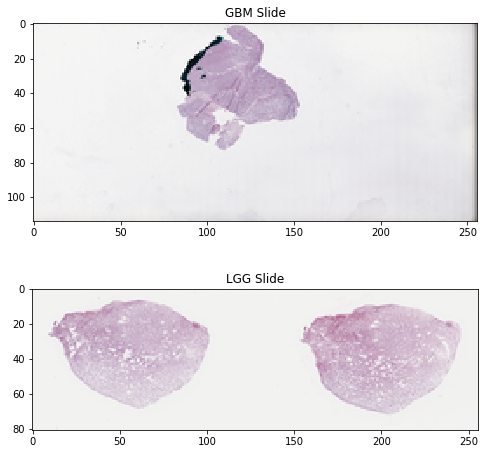

In [259]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('GBM Slide')
plt.imshow(get_img('gbm',20))
plt.subplot(2,1,2)
plt.title('LGG Slide')
plt.imshow(get_img('lgg',20))

In [260]:
lgg = pd.read_pickle('../tcga/dense_features/lgg_features_v1.pkl')

In [261]:
lgg['TYPE'] = 0
#gbm['TYPE'] = 1
lgg.head()

,Size.Area,Size.MajorAxisLength,Size.MinorAxisLength,Size.Perimeter,Shape.Circularity,Shape.Eccentricity,Shape.EquivalentDiameter,Shape.Extent,Shape.MinorMajorAxisRatio,Shape.Solidity,Case,ID,Case,Grade,Age (years at diagnosis),Gender,Survival (months),Vital status (1=dead),MGMT promoter status,TYPE
0,18.7026,11.0709,4.48802,14.7343,2.04022,0.837254,4.60687,0.476033,0.488972,0.689054,TCGA-HT-7881,TCGA-HT-78818,TCGA-HT-7881,2,38,1,2.92409,0,1,0
0,309,42.3083,23.6038,185.953,0.112295,0.829908,19.8351,0.201961,0.5579,0.325263,TCGA-HT-7860,TCGA-HT-78606,TCGA-HT-7860,3,60,0,0.492824,0,1,0
0,49.3051,19.0428,9.11525,32.2708,2.00433,0.824781,7.10002,0.295501,0.508077,0.455275,TCGA-HT-7856,TCGA-HT-78564,TCGA-HT-7856,3,35,1,39.0645,0,1,0
0,241.715,33.7481,22.668,151.829,0.227431,0.706088,16.6412,0.220376,0.676223,0.317942,TCGA-QH-A6XC,TCGA-QH-A6XC9,TCGA-QH-A6XC,3,48,1,5.0268,0,1,0
0,65.1994,20.4206,9.70508,40.1092,1.33623,0.825995,8.14706,0.304788,0.507402,0.465548,TCGA-W9-A837,TCGA-W9-A8379,TCGA-W9-A837,2,47,1,45.0441,0,1,0
